In [1]:
import pandas as pd
import seaborn as sns
import pathlib
cwd = pathlib.Path.cwd()

pd.set_option('display.max_rows', 1000)


In [2]:
syslog_csv_file = cwd / 'test-data/debian-10/syslog.csv'

In [3]:
syslog_df = pd.read_csv(syslog_csv_file)

In [13]:
syslog_df.head(5)

,line_number,line_length,extracted_date,unix_timestamp,real_date,hostname,daemon,line,remains_of_line,wiped_line
0,0,71,Aug 15 08:22:53,1.629012e+09,2021-08-15 08:22:53,debian,systemd-modules-load[272]:,Aug 15 08:22:53 debian systemd-modules-load[27...,debian systemd-modules-load[272]: Inserted mo...,debian systemd-modules-load[]: Inserted module...
1,1,74,Aug 15 08:22:53,1.629012e+09,2021-08-15 08:22:53,debian,systemd-modules-load[272]:,Aug 15 08:22:53 debian systemd-modules-load[27...,debian systemd-modules-load[272]: Inserted mo...,debian systemd-modules-load[]: Inserted module...
2,2,79,Aug 15 08:22:53,1.629012e+09,2021-08-15 08:22:53,debian,systemd-modules-load[272]:,Aug 15 08:22:53 debian systemd-modules-load[27...,debian systemd-modules-load[272]: Inserted mo...,debian systemd-modules-load[]: Inserted module...
3,3,92,Aug 15 08:22:53,1.629012e+09,2021-08-15 08:22:53,debian,systemd-sysusers[281]:,Aug 15 08:22:53 debian systemd-sysusers[281]: ...,debian systemd-sysusers[281]: Creating group ...,debian systemd-sysusers[]: Creating group syst...
4,4,125,Aug 15 08:22:53,1.629012e+09,2021-08-15 08:22:53,debian,systemd-sysusers[281]:,Aug 15 08:22:53 debian systemd-sysusers[281]: ...,debian systemd-sysusers[281]: Creating user s...,debian systemd-sysusers[]: Creating user syste...


In [5]:
syslog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   line_number      2212 non-null   int64  
 1   line_length      2212 non-null   int64  
 2   extracted_date   2212 non-null   object 
 3   unix_timestamp   2212 non-null   float64
 4   real_date        2212 non-null   object 
 5   hostname         2212 non-null   object 
 6   daemon           2212 non-null   object 
 7   line             2212 non-null   object 
 8   remains_of_line  2212 non-null   object 
 9   wiped_line       2212 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 172.9+ KB


Convert `real_date` to a pandas date. `real_date` will have a Dtype of `datetime64` when the `syslog_df.info()` is run:

Text(0.4, 0.98, 'Syslog line length vs number by daemon')

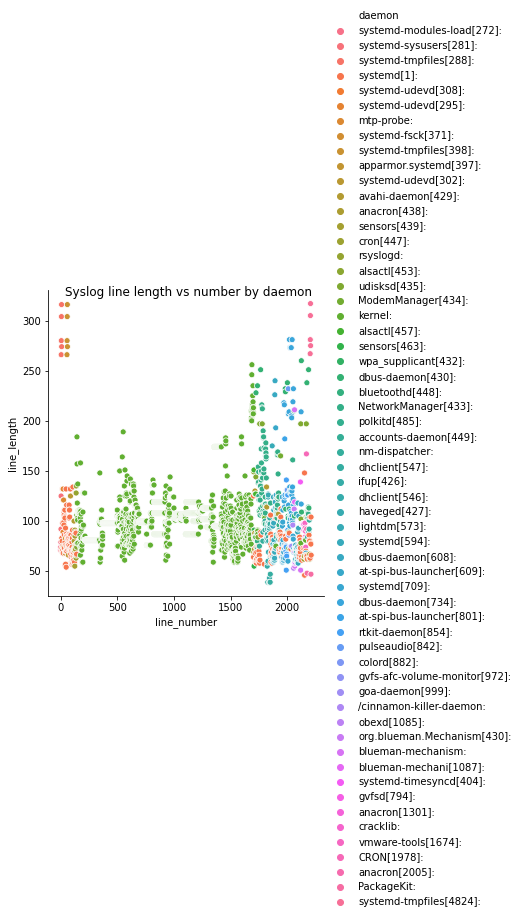

In [19]:
my_plot = sns.relplot(data=syslog_df, x="line_number", y='line_length', hue='daemon')
my_plot.fig.suptitle("Syslog line length vs number by daemon", x=0.4, y=0.98)

In [7]:
syslog_df['real_date'] = pd.to_datetime(syslog_df['real_date'])
syslog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   line_number      2212 non-null   int64         
 1   line_length      2212 non-null   int64         
 2   extracted_date   2212 non-null   object        
 3   unix_timestamp   2212 non-null   float64       
 4   real_date        2212 non-null   datetime64[ns]
 5   hostname         2212 non-null   object        
 6   daemon           2212 non-null   object        
 7   line             2212 non-null   object        
 8   remains_of_line  2212 non-null   object        
 9   wiped_line       2212 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 172.9+ KB


#### What are the most common lines (stripped of numbers/GUIDS in the syslog file?
The `wiped_line` column represents the syslog message with GUIDS and numbers stripped from it.

In [8]:
syslog_df['wiped_line'].value_counts()

debian kernel: [    .] ACPI: LAPIC_NMI (acpi_id[x] high edge lint[x])                                                                             80
debian kernel: [    .] SRAT: PXM  -> APIC x -> Node                                                                                               50
debian kernel: [    .] pci ::.: PCI bridge to [bus ]                                                                                              43
debian kernel: [    .] pci ::.: BAR : no space for [io  size x]                                                                                   40
debian kernel: [    .] pci ::.: BAR : failed to assign [io  size x]                                                                               40
                                                                                                                                                  ..
debian anacron[]: Updated timestamp for job `cron.weekly' to --                                           

##### Percentage of total for `wiped_line`


In [9]:
syslog_df['wiped_line'].value_counts(normalize=True)

debian kernel: [    .] ACPI: LAPIC_NMI (acpi_id[x] high edge lint[x])                                                                             0.036166
debian kernel: [    .] SRAT: PXM  -> APIC x -> Node                                                                                               0.022604
debian kernel: [    .] pci ::.: PCI bridge to [bus ]                                                                                              0.019439
debian kernel: [    .] pci ::.: BAR : no space for [io  size x]                                                                                   0.018083
debian kernel: [    .] pci ::.: BAR : failed to assign [io  size x]                                                                               0.018083
                                                                                                                                                    ...   
debian anacron[]: Updated timestamp for job `cron.weekly' to --       

In [10]:
syslog_df['daemon'].value_counts(normalize='true')

kernel:                          0.710217
systemd[1]:                      0.092676
NetworkManager[433]:             0.033454
systemd[594]:                    0.023960
systemd[709]:                    0.017179
dbus-daemon[734]:                0.012658
dbus-daemon[430]:                0.009042
gvfsd[794]:                      0.008137
rtkit-daemon[854]:               0.006329
dhclient[547]:                   0.006329
avahi-daemon[429]:               0.006329
ifup[426]:                       0.005877
anacron[438]:                    0.005425
nm-dispatcher:                   0.004521
udisksd[435]:                    0.004521
vmware-tools[1674]:              0.003617
dhclient[546]:                   0.003617
bluetoothd[448]:                 0.003165
blueman-mechanism:               0.003165
systemd-tmpfiles[4824]:          0.002260
systemd-tmpfiles[288]:           0.002260
systemd-tmpfiles[398]:           0.002260
alsactl[453]:                    0.001808
haveged[427]:                    0

In [11]:
syslog_df['line_length'].value_counts()

81     152
98     150
108     91
87      88
99      71
119     69
103     60
76      60
107     58
95      56
100     56
102     50
113     49
124     45
101     41
110     34
174     32
94      31
73      31
91      27
97      25
104     23
109     23
75      23
105     23
84      23
72      22
70      21
86      21
69      21
116     21
59      21
83      20
79      20
82      19
85      19
128     18
77      18
71      18
61      16
111     16
80      16
92      16
64      16
74      16
89      15
66      15
88      14
106     14
136     14
112     13
63      13
65      13
93      12
67      11
78      11
62      11
96      11
123     10
115     10
60      10
90      10
125      9
126      9
68       9
130      7
127      7
58       7
121      7
132      7
135      6
118      5
120      5
114      5
117      5
184      5
197      4
122      4
144      4
55       4
213      4
134      4
57       3
281      3
137      3
39       3
129      3
209      3
148      3
141      3
143      3